In [1]:
import numpy as np

m = 100
np.random.seed(42)
X = 2 * np.random.rand(m,1)
y = 4 + 3 * X + np.random.randn(m,1)

In [2]:
X[:5]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

In [3]:
y[:5]

array([[6.33428778],
       [9.40527849],
       [8.48372443],
       [5.60438199],
       [4.71643995]])

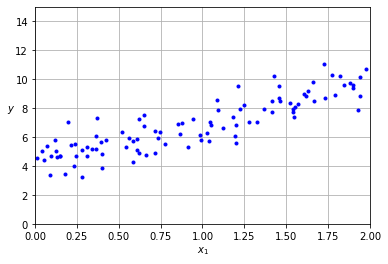

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [5]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
print('Input', X_b[0:3])


Input [[1.         0.74908024]
 [1.         1.90142861]
 [1.         1.46398788]]


In [6]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print('Theta_Best', theta_best)

Theta_Best [[4.21509616]
 [2.77011339]]


In [7]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
print('Input is', X_new_b, 'Output is',y_predict)

Input is [[1. 0.]
 [1. 2.]] Output is [[4.21509616]
 [9.75532293]]


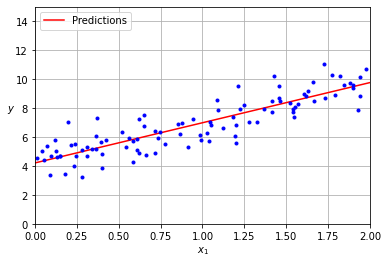

In [8]:
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

plt.show()

## Train the Linear Regression Model

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # Initialise
lin_reg.fit(X, y) # To train the model

lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
lin_reg.predict([[1.5]])

array([[8.37026624]])

In [11]:
(1.5 * 2.77) + 4.21

8.365

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
len(X)

100

In [14]:
len(X_train)

80

In [15]:
len(X_test)

20

## Evaluation of the model

In [16]:
y_pred = lin_reg.predict(X)

In [17]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, y_pred)

0.8065845639670531

In [18]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, y_pred)

0.7010426719637758

In [19]:
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.7692735413614223

# Train the model on the split data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lin_reg = LinearRegression() # Initialise
lin_reg.fit(X_train, y_train) # To train the model

lin_reg.intercept_, lin_reg.coef_

(array([3.91732478]), array([[3.04763361]]))

In [21]:
y_pred = lin_reg.predict(X_test)
mean_squared_error(y_test, y_pred)

1.032789706948385

In [22]:
r2_score(y_test, y_pred)

0.6417865797762515

## Gradient Descent

In [23]:
from sklearn.linear_model import SGDRegressor

In [24]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.1,
                       n_iter_no_change=100, random_state=42)

In [25]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, n_iter_no_change=100, penalty=None, random_state=42,
             tol=1e-05)

In [26]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.22612746]), array([2.79035392]))

In [28]:
sgd_reg.n_iter_

113

In [27]:
theta_best

array([[4.21509616],
       [2.77011339]])

# Task
## Modify the values of eta, make it large and small and train the models
## Try setting smaller values for max_iter and train the models

In [29]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.0001, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_, sgd_reg.n_iter_

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


(array([2.65476619]), array([2.76764482]), 1000)

In [30]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=5, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_, sgd_reg.n_iter_

(array([4.52875702]), array([4.21943771]), 392)

In [39]:
sgd_reg = SGDRegressor(max_iter=150, tol=1e-5, penalty=None, eta0=0.1, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_, sgd_reg.n_iter_

(array([4.22612746]), array([2.79035392]), 113)

In [42]:
sgd_reg = SGDRegressor(max_iter=150, tol=1e-3, penalty=None, eta0=0.1, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_, sgd_reg.n_iter_

(array([4.19838545]), array([2.76123802]), 101)